In [1]:
using ReachabilityModels, ReachabilityAnalysis, Plots

## Integration with a negative time-span

Below we make an initial forward integration, get the final set, and integrate backwards starting from that set.

Due to a current limitation on the initial states of TMJets (see https://github.com/JuliaReach/ReachabilityAnalysis.jl/issues/199), that we can't pass zonotope initial conditions, the initial state of the second call to `solve` is overapproxative, but in principle we shall be able to pass the exact set.

In [2]:
prob = fetch_model("vanderpol")

prob = IVP(prob.s, prob.x0 * 0.01)
sol = solve(prob, tspan=(0.0, 5.0));
solz = overapproximate(sol, Zonotope);

solback = solve(IVP(prob.s, set(solz[end])), tspan=(0.0, -5.0));
solbackz = overapproximate(solback, Zonotope);

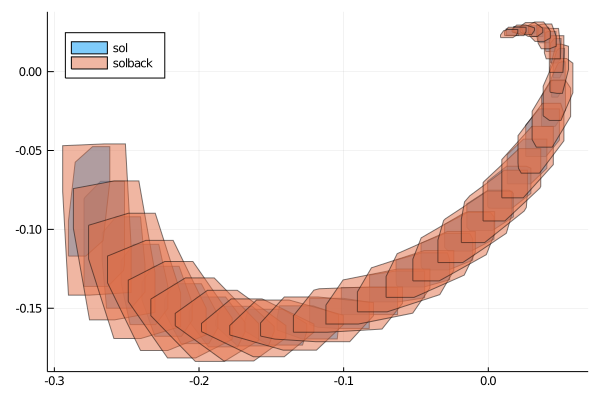

In [3]:
plot(solz, vars=(1, 2), lab="sol", legend=:topleft)
plot!(solbackz, vars=(1, 2), lab="solback")

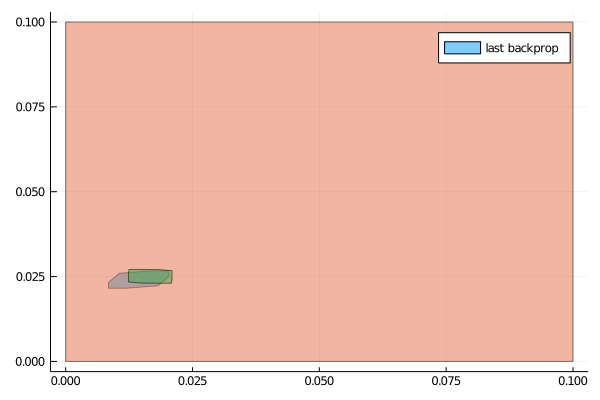

In [4]:
plot(solbackz[end], vars=(1, 2), lab="last backprop")
plot!(Hyperrectangle(low=[0.0, 0.0], high=[0.1, 0.1]))
plot!(solz[1], vars=(1, 2))

## Backward integration given a bad states

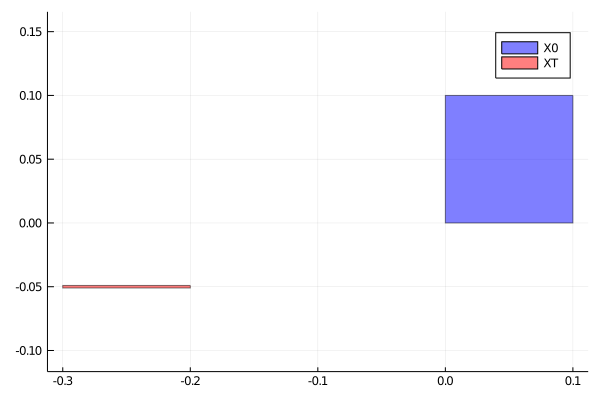

In [5]:
X0 = Hyperrectangle(low=[0.0, 0.0], high=[0.1, 0.1])
XT = Hyperrectangle(low=[-0.3, -0.051], high=[-0.2, -0.049])

plot(X0, lab="X0", c="blue")
plot!(XT, lab="XT", c="red", ratio=1)

**Intuition:**

Comuputing the backwards reachable set => we obtain an upper bound on the probability of hitting the bad states.

Computing the backward reachable set with an inner backward reachable set => we get a lower bound on the probability of hitting the unsafe states.

If the flowpipe is tighter => the upper bound is better (decreases).

If the intersection is empty => the upper bound is exact (safety guarantee)

If the intersection coveres the whole X0 => the upper bound is not very useful.

---

## Example

In [6]:
X0 = Hyperrectangle(low=[0.0, 0.0], high=[0.1, 0.1])
XT = Hyperrectangle(low=[-0.3, -0.051], high=[-0.2, -0.049])

Hyperrectangle{Float64,Array{Float64,1},Array{Float64,1}}([-0.25, -0.05], [0.04999999999999999, 0.0010000000000000009])

In [7]:
solback = solve(IVP(prob.s, XT), tspan=(0.0, -5.0));
solbackz = overapproximate(solback, Zonotope);

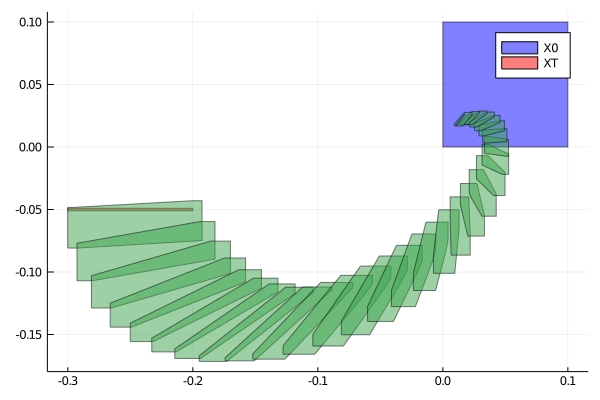

In [8]:
plot(X0, lab="X0", c="blue")
plot!(XT, lab="XT", c="red", ratio=1)

plot!(solbackz[1:end], vars=(1, 2))

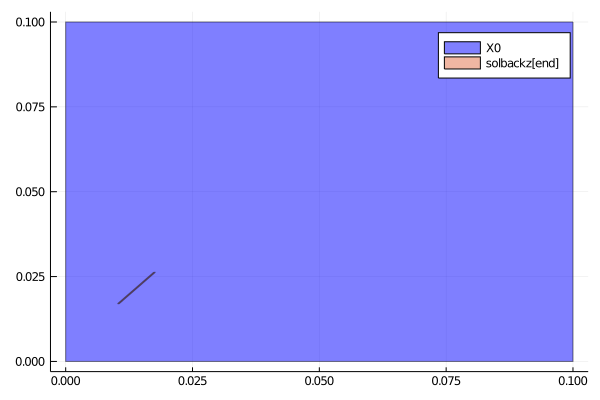

In [9]:
plot(X0, lab="X0", c="blue")
#plot!(XT, lab="XT", c="red", ratio=1)

plot!(solbackz[end], vars=(1, 2), lab="solbackz[end]")

Let $p_0$ be the probability associated to the relative area (which depends on the underlying probability distribution).

$P(\textrm{X0 hits a bad state in 5sec}) \leq p_0$

---

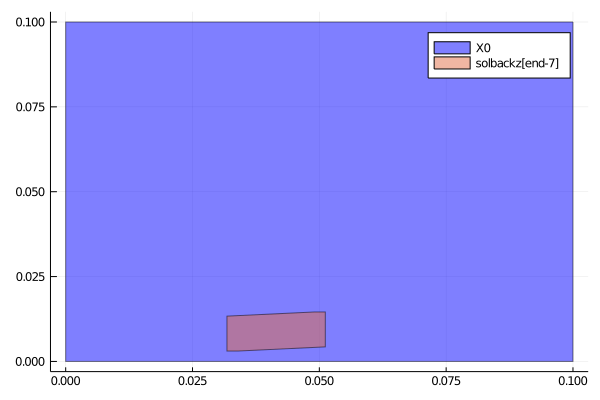

In [10]:
plot(X0, lab="X0", c="blue")
#plot!(XT, lab="XT", c="red", ratio=1)

plot!(solbackz[end-7], vars=(1, 2), lab="solbackz[end-7]")

In [11]:
tspan(solbackz[end-7])

[-3.49563, -3.70817]

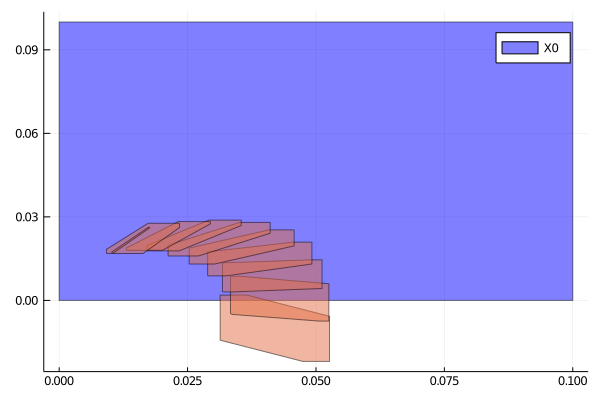

In [12]:
plot(X0, lab="X0", c="blue")
#plot!(XT, lab="XT", c="red", ratio=1)

solbackz0 = filter(R -> !isdisjoint(set(R), X0), array(solbackz));

plot!(solbackz0, vars=(1, 2))

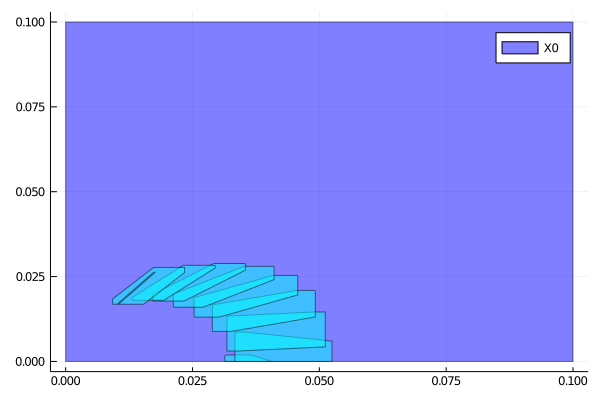

In [13]:
plot(X0, lab="X0", c="blue")
#plot!(XT, lab="XT", c="red", ratio=1)

solbackz0_in = [intersection(set(R), X0) for R in solbackz0];
plot!(solbackz0_in, vars=(1, 2), c="cyan")

In [14]:
sum(area(X) for X in solbackz0_in) # upper bound

0.0010544545715669813

Let $p_1$ be the probability associated to the relative area (which depends on the underlying probability distribution).

$P(\textrm{X0 hits a bad state between 0 and 5sec}) \leq p_1$ (?)